In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dir_list = os.listdir("./../out/corrected/counts")
print("Directories we will be working with: ", dir_list)

data = {}
print("Total number of files: ", len(dir_list))

#  should I include r_np-cc_repeat_aa-seq 

for dir in dir_list:
    if not re.findall("aav2.*", dir):
        temp = re.findall(".*np-cc_aa-seq-counts.*", dir)
        if temp:
            if "r_np_cc_aa" in data:
                data["r_np_cc_aa"].append(temp[0])
            else:
                data["r_np_cc_aa"] = [temp[0]]
            continue

        temp = re.findall(".*np_aa-seq-counts.*", dir)
        if temp:
            if "r_np_aa" in data:
                data["r_np_aa"].append(temp[0])
            else:
                data["r_np_aa"] = [temp[0]]
            continue

        temp = re.findall(".*np_nt-seq-counts.*", dir)
        if temp:
            if "r_np_nt" in data:
                data["r_np_nt"].append(temp[0])
            else:
                data["r_np_nt"] = [temp[0]]
            continue
        
        temp = re.findall(".*np-cc_nt-seq-counts.*", dir)
        if temp:
            if "r_np_cc_nt" in data:
                data["r_np_cc_nt"].append(temp[0])
            else:
                data["r_np_cc_nt"] = [temp[0]]
            continue

        temp = re.findall(".*np-cc_gel-extract_nt-seq-counts.*", dir)
        if temp:
            if "r_np_cc_gel_extract_nt" in data:
                data["r_np_cc_gel_extract_nt"].append(temp[0])
            else:
                data["r_np_cc_gel_extract_nt"] = [temp[0]]
            continue

        temp = re.findall(".*np-cc_gel-extract_aa-seq-counts.*", dir)
        if temp:
            if "r_np_cc_gel_extract_aa" in data:
                data["r_np_cc_gel_extract_aa"].append(temp[0])
            else:
                data["r_np_cc_gel_extract_aa"] = [temp[0]]
            continue

print("Number of \"matches\": ", len(data))

sum = 0
for d in data:
    sum += len(data[d])

print("Number of files we will be working on: ", sum)


Directories we will be working with:  ['r0_pb_aa-seq-translated.tsv.gz', 'aav2-np_nt-seq-counts.tsv.gz', 'r5_np_aa-seq-translated.tsv.gz', 'r0_pb_aa-seq-counts.tsv.gz', 'r0_np-cc_repeat_nt-seq-counts.tsv.gz', 'aav2_np-cc_aa-seq-counts.tsv.gz', 'aav2_np-cc_nt-seq-counts.tsv.gz', 'aav2_np-cc_aa-seq-translated.tsv.gz', 'r5_np_aa-seq-counts.tsv.gz', 'r0_pb_nt-seq-counts.tsv.gz', 'r5_np-cc_aa-seq-counts.tsv.gz', 'r1_np-cc_gel-extract_aa-seq-counts.tsv.gz', 'r0_np-cc_repeat_aa-seq-counts.tsv.gz', 'r0_np-cc_gel-extract_aa-seq-counts.tsv.gz', 'r0_np-cc_repeat_aa-seq-translated.tsv.gz', 'r0_np_nt-seq-counts.tsv.gz', 'r5_np-cc_aa-seq-translated.tsv.gz', 'r0_np-cc_gel-extract_nt-seq-counts.tsv.gz', 'r1_np-cc_gel-extract_nt-seq-counts.tsv.gz', 'r0_np_aa-seq-counts.tsv.gz', 'r1_np-cc_aa-seq-counts.tsv.gz', 'r0_np-cc_aa-seq-counts.tsv.gz', 'r5_sanger_aa-seq-translated.tsv.gz', 'r1_np-cc_nt-seq-counts.tsv.gz', 'r5_sanger_nt-seq-counts.tsv.gz', 'r5_np_nt-seq-counts.tsv.gz', 'r0_np-cc_nt-seq-counts.tsv

In [16]:
# JUST FOR TESTING
test1 = pd.read_csv("./../out/corrected/counts/r0_np_aa-seq-counts.tsv.gz", sep='\t').rename(columns={'count' : 'r0'})
test2 = pd.read_csv("./../out/corrected/counts/r5_np_aa-seq-counts.tsv.gz", sep='\t').rename(columns={'count' : 'r5'})
mtest = pd.merge(test1, test2, on='sequence')

print(mtest,"\n")
print(mtest.sum())

   r0                                           sequence  r5
0   1  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...  82
1   1  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...  17
2   1  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...   2
3   1  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...  32
4   1  MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...   1 

r0                                                          5
sequence    MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...
r5                                                        134
dtype: object


In [10]:
# One data fram for each combination of rounds with 0 (so only r0 to r1 and r0 to r5)
merged_0_1 = pd.DataFrame()
merged_0_5 = pd.DataFrame()

for t in data:
    # transfer the data in the files into a DataFrame object
    round0 = pd.DataFrame()
    round1 = pd.DataFrame()
    round2 = pd.DataFrame()
    for file_name in data[t]:
        print("file name working: ", file_name)
        if re.search("r0.*", file_name):
            round0 = pd.read_csv("./../out/corrected/counts/" + file_name, sep='\t').rename(columns={'count' : 'r0'})
            round0['r0'] = round0['r0'].div(round0.sum()['r0'])
            # round0['r0'] = round0['r0'].div(len(round0))
        elif re.search("r1.*", file_name):
            round1 = pd.read_csv("./../out/corrected/counts/" + file_name, sep='\t').rename(columns={'count' : 'r1'})
            round1['r1'] = round1['r1'].div(round1.sum()['r1'])
            # round1['r1'] = round1['r1'].div(len(round1))
        elif re.search("r5.*", file_name):
            round5 = pd.read_csv("./../out/corrected/counts/" + file_name, sep='\t').rename(columns={'count' : 'r5'})
            round5['r5'] = round5['r5'].div(round5.sum()['r5'])
            # round5['r5'] = round5['r5'].div(len(round5))
    
    # Merge the data into merged_0_1 or merged_0_5
    if not round0.empty and not round1.empty:
        # round1 = TODO: you have to divide the values to have the fraction of reads not the total reads
        if len(merged_0_1) == 0:
            merged_0_1 = pd.merge(round0, round1, on='sequence')
        else:
            temp_merged = pd.merge(round0, round1, on='sequence')
            merged_0_1 = pd.concat([temp_merged, merged_0_1]).drop_duplicates(subset=['sequence'])
    
    if not round0.empty and not round5.empty:
        if len(merged_0_5):
            merged_0_5 = pd.merge(round0, round5, on='sequence')
        else:
            temp_merged = pd.merge(round0, round5, on='sequence')
            merged_0_5 = pd.concat([temp_merged, merged_0_5]).drop_duplicates(subset=['sequence'])

file name working:  r5_np_aa-seq-counts.tsv.gz
file name working:  r0_np_aa-seq-counts.tsv.gz
file name working:  r5_np-cc_aa-seq-counts.tsv.gz
file name working:  r1_np-cc_aa-seq-counts.tsv.gz
file name working:  r0_np-cc_aa-seq-counts.tsv.gz


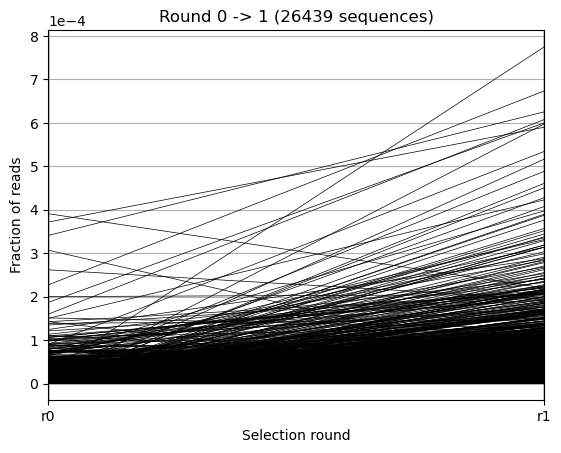

In [9]:
graph = pd.plotting.parallel_coordinates(merged_0_1, "sequence", color='black', linewidth=0.5)


plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.title(f"Round 0 -> 1 ({len(merged_0_1)} sequences)")
graph.legend_ = None
plt.ylabel("Fraction of reads")
plt.xlabel("Selection round")


plt.savefig('./replacation_of_ro_to_r1_plot.png')

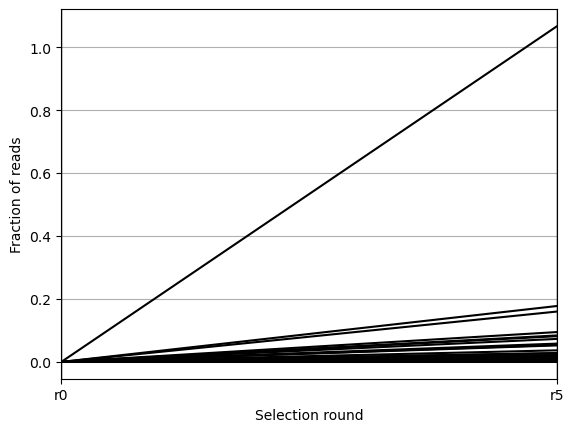

In [17]:
graph = pd.plotting.parallel_coordinates(merged_0_5, "sequence", color='black')

plt.title(f"Round 0 -> 5 ({len(merged_0_5)} sequences)")
graph.title(f"Round 0 -> 1 ({len(merged_0_5)})")
graph.legend_ = None
plt.ylabel("Fraction of reads")
plt.xlabel("Selection round")


plt.savefig('./replacation_of_ro_to_r5_plot.png')

In [18]:
print(len(merged_0_5))
# I am defenetly missing some data

104
